# Experiment #5: Unsupervised Learning
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

## 1.3 Procedures

### 1.3.1 Data Generation

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)


#### Data/blobs visualization

Text(0.5, 1.0, 'Blobs with lables')

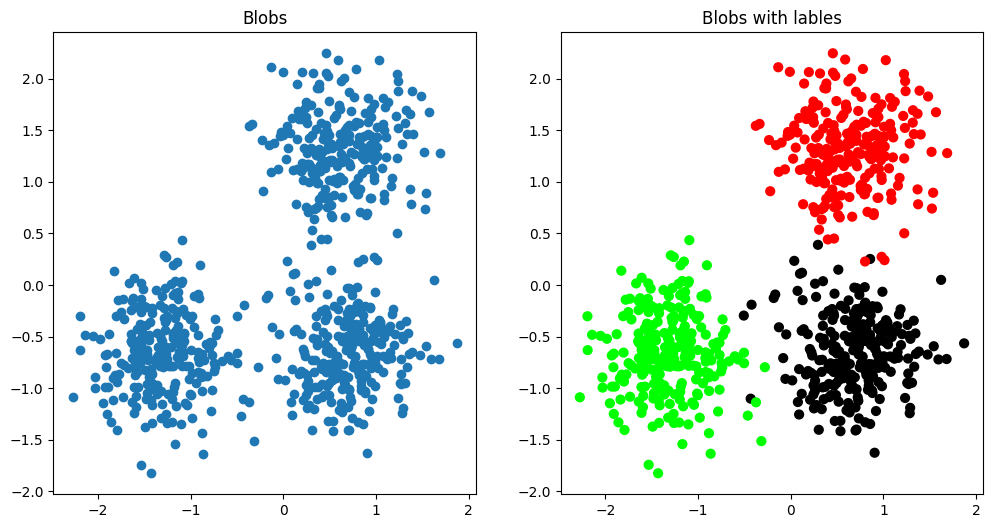

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

### 1.3.2 Compute KMeans

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)


#### Data/blobs visualization after KMeans clustering

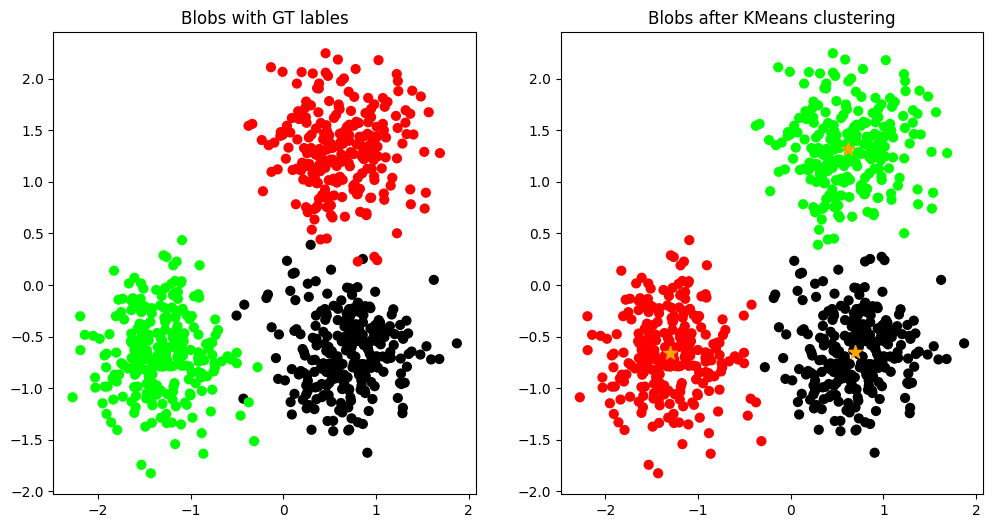

In [9]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers

#print(cluster_center)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

### 1.3.3 Compute DBSCAN

In [10]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


#### Data/blobs visualization after DBSCAN clustering

Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

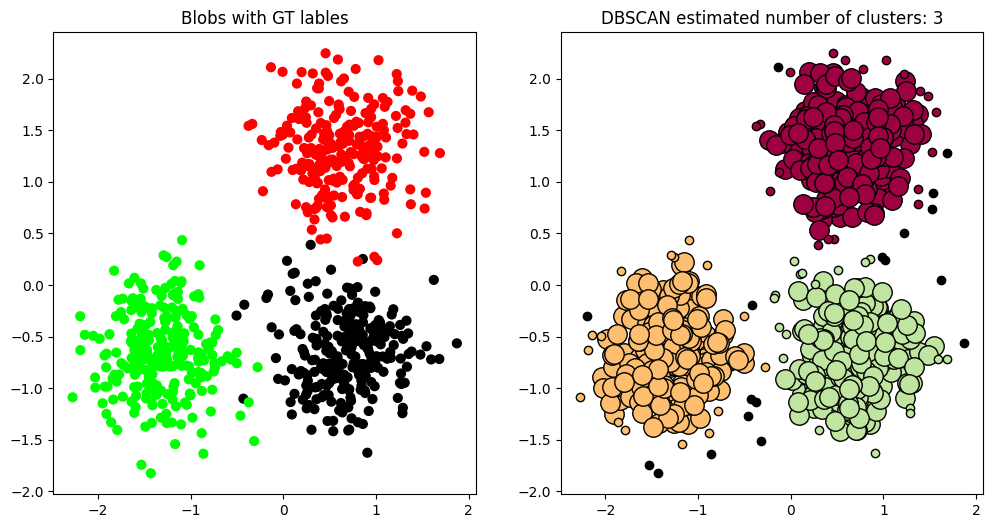

In [11]:
plt.figure(figsize=(12,6))

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size

plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]

    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

### 1.3.4 Compute Gaussian Mixture Model (GMM)

In [12]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

#### Data/blobs visualization after GMM clustering

Text(0.5, 1.0, 'Blobs after GMMs clustering')

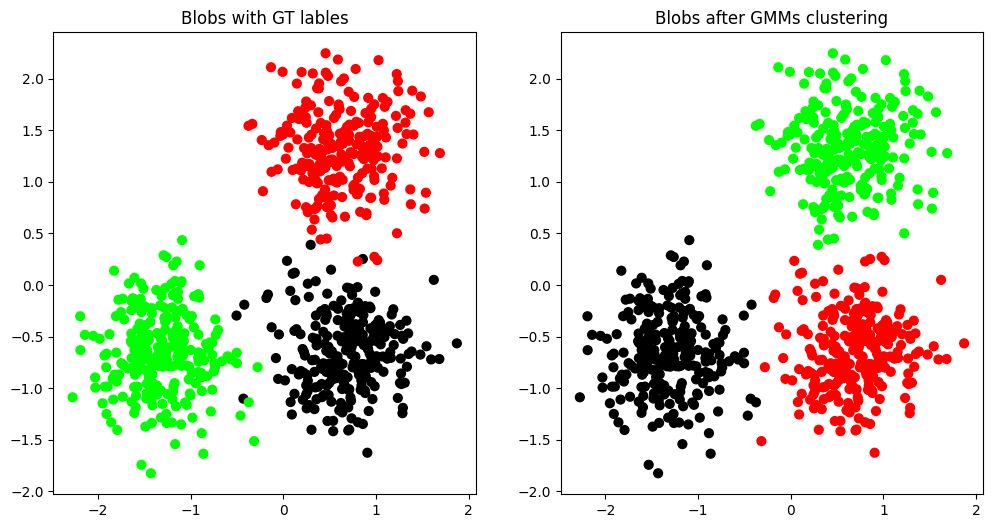

In [13]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

## 1.4 Quantitative results comparison of the clustering methods using evaluation measures

In [16]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,labels):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")


print(f"K-Means Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")


print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true,y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")


---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


## 1.5 To DO

### 1)

#### Generating Data

In [17]:
# Generate a non Gaussian 2D dataset (two moons)
from sklearn.datasets import make_moons
X, labels_true = make_moons(n_samples=500, noise=0.1)

#### Data/blobs visualization

Text(0.5, 1.0, 'Blobs with lables')

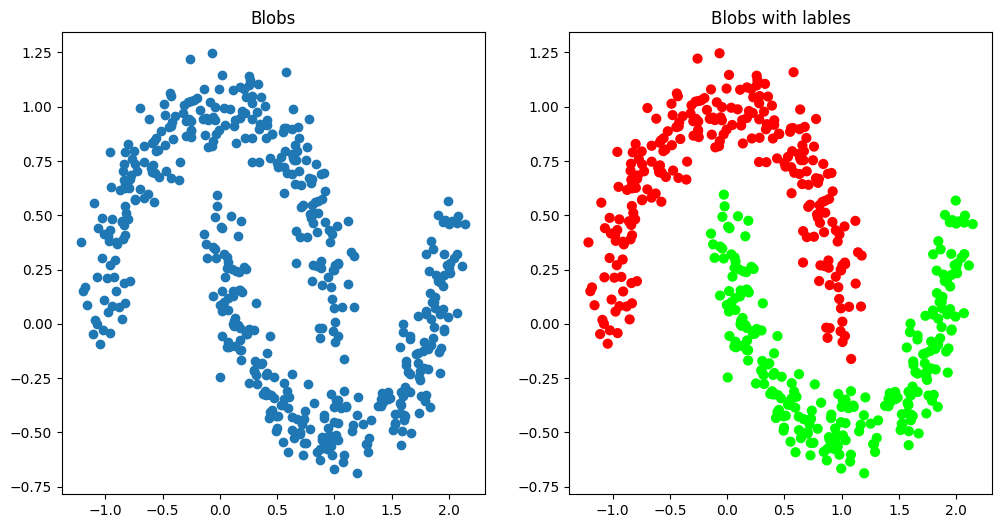

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

#### KMeans

In [22]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 2
model=KMeans(n_clusters=2)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)


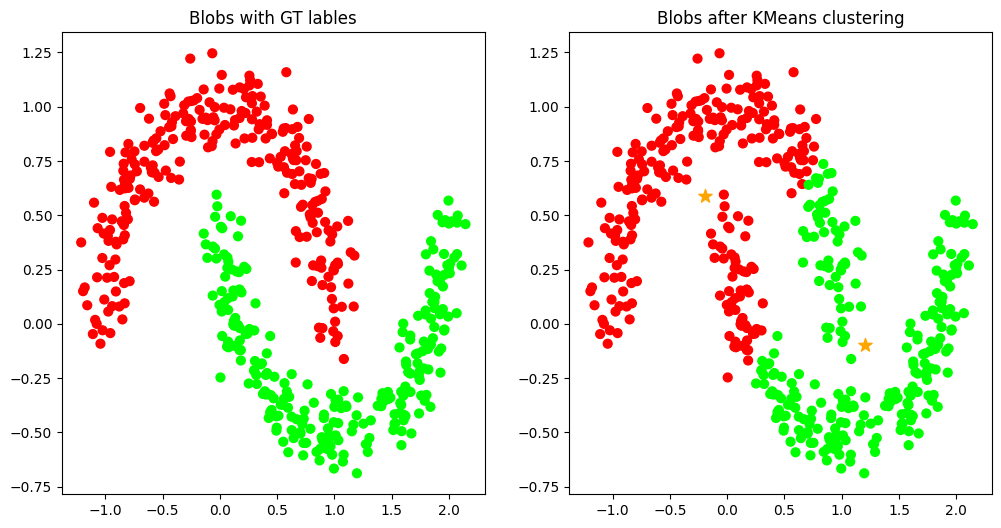

In [23]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers

#print(cluster_center)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

#### DBSCAN

In [26]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for blobs data

labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 5


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 2')

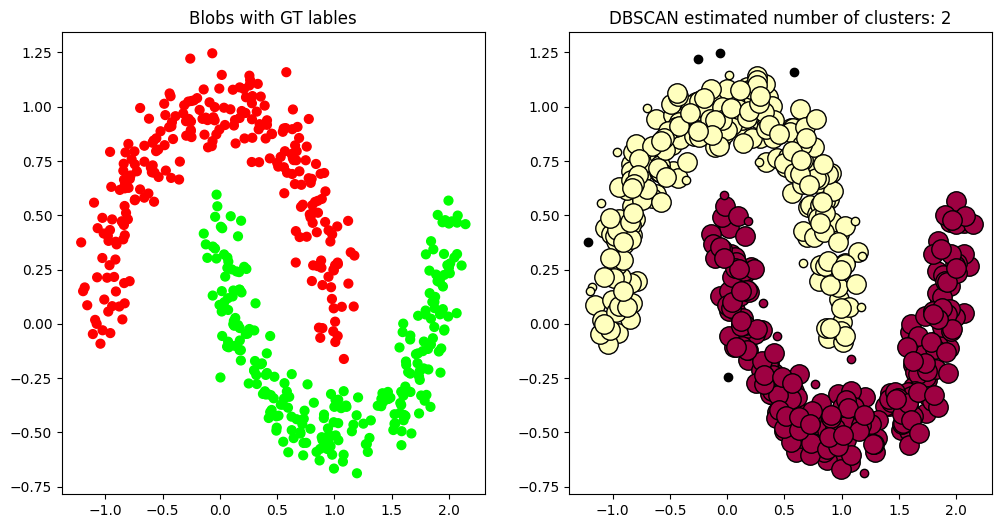

In [27]:
plt.figure(figsize=(12,6))

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size

plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]

    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

# fg